In [33]:
import pandas as pd 

data = pd.read_csv('./diabetes.csv') 
data.head()

#outcome 1 = diabetes 0 = none 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


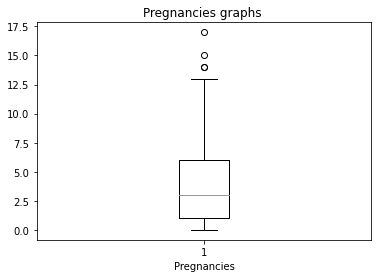

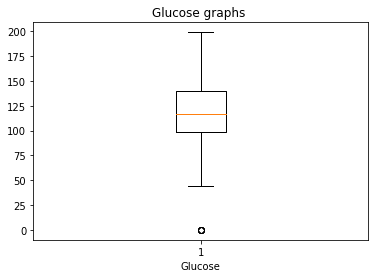

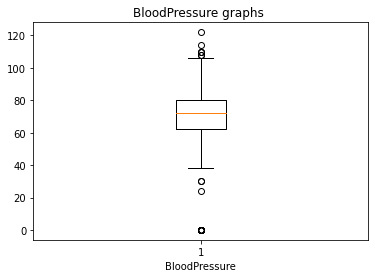

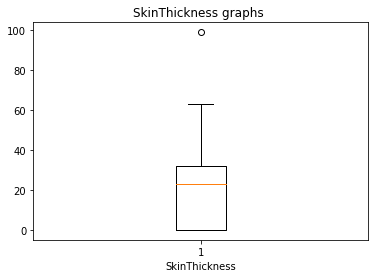

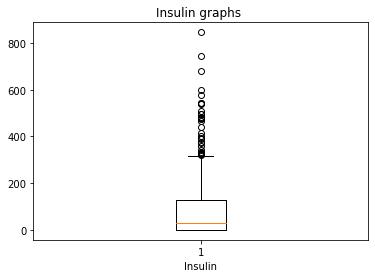

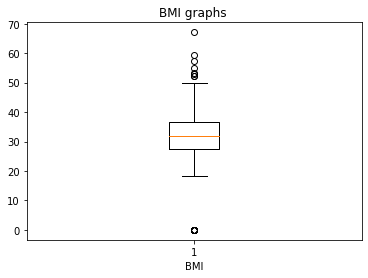

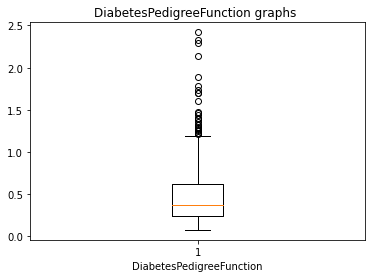

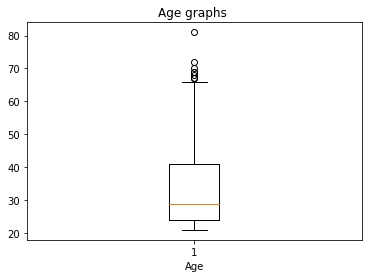

In [6]:
import numpy as np
import matplotlib.pyplot as plt

for i in data.columns[:8]:
    plt.title(i + " graphs ")
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()


In [7]:
data.shape

(768, 9)

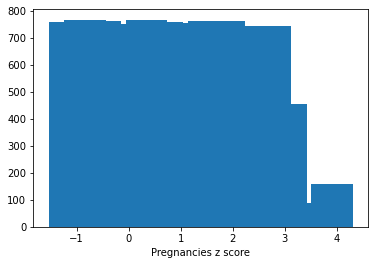

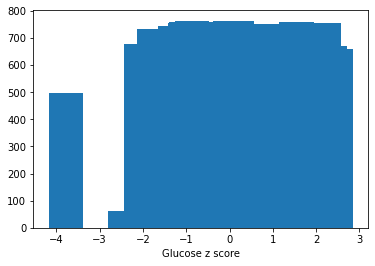

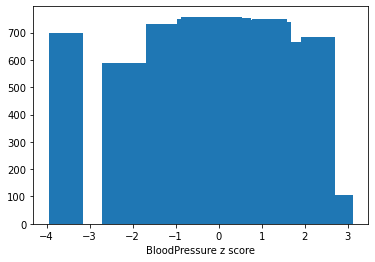

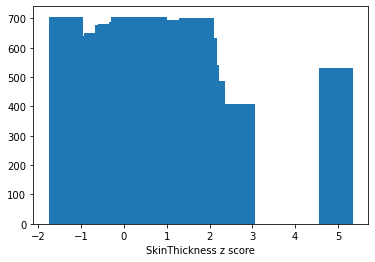

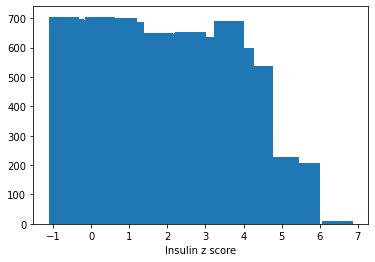

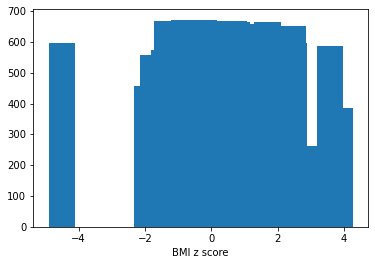

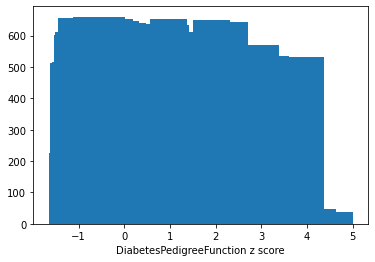

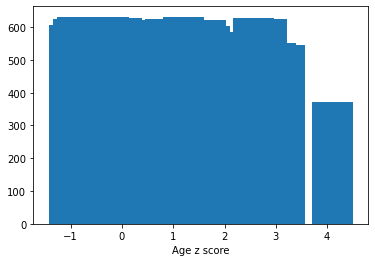

In [35]:
for c in data.columns[:8] :
        data["zscore"] =((data[c] - data[c].mean())/data[c].std(ddof=0))
        plt.bar(data['zscore'],range(data.shape[0]))
        plt.xlabel(c + ' z score' )
        plt.show()
        data = data[(abs(data["zscore"])<3.5)]
        data.drop("zscore",axis=1,inplace=True)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        IQR = Q3 - Q1 
        data = data[(data[c] > (Q1 - 1.5 * IQR)) & (data[c] < (Q3 + 1.5 * IQR))]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               619 non-null    int64  
 1   Glucose                   619 non-null    int64  
 2   BloodPressure             619 non-null    int64  
 3   SkinThickness             619 non-null    int64  
 4   Insulin                   619 non-null    int64  
 5   BMI                       619 non-null    float64
 6   DiabetesPedigreeFunction  619 non-null    float64
 7   Age                       619 non-null    int64  
 8   Outcome                   619 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.4 KB


In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm 
from sklearn.metrics import classification_report ,accuracy_score

#splitting the data
target = np.asarray(dataframe['Disease']).reshape(-1,1)
X =  np.asarray(dataframe.drop(['Disease'],inplace=False,axis=1)
x_train,x_test , y_train,y_test = train_test_split(X,target, test_size = .2 , random_state = 42, shuffle = True)
                
#using grid search (Support Vector Classification) to get the best parameters
                
params = [{"C" : [2**-5,2**-3,2**5],"gamma" : [ 2**-4 , 2**-3 , 2**-1 , 1  ],
           'kernel' : ['linear', 'rbf'] , "random_state" : [42] } ]
score = ["accuracy" ,"f1","precision","recall"]

model = GridSearchCV(svm.SVC(),params,scoring = "accuracy",n_jobs = -1)

model.fit(x_train,y_train.ravel())
print("best parameters : ",model.best_params_)

best parameters :  {'C': 32, 'gamma': 0.0625, 'kernel': 'linear', 'random_state': 42}


In [70]:
y_pre = model.predict(x_test)

In [71]:
accuracy_score(y_pre,y_test)

0.8048780487804879

In [72]:
import joblib 

joblib.dump(model,'../desease pred/diabetes_model.sav')

['../desease pred/diabetes_model.sav']